# Phugoid

    http://en.wikipedia.org/wiki/Phugoid

Requirements
---
- export JSAnimation to moviepy

Premilary
---
- Theory of Phugoid
  > The phugoid oscillation has the aircraft pitching up and down, as it decelerates and accelerates. The trajectory might look like a sinusoid.


In [1]:
%matplotlib inline
import numpy as np
from numpy import sin,cos,pi 
from scipy.integrate import ode,odeint
import matplotlib.pylab as plt
from matplotlib import animation
#from JSAnimation import IPython_display
from ipywidgets import interactive
from IPython.display import clear_output
import time,random

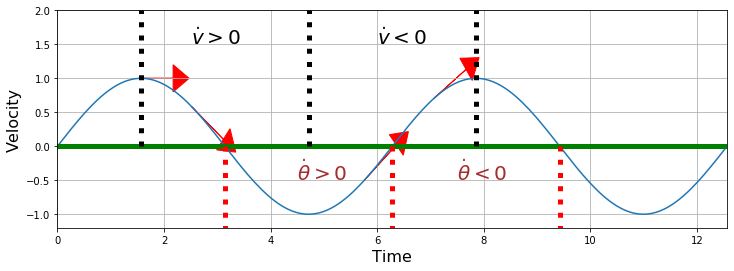

In [2]:

t=np.linspace(0,4*pi,201)
plt.figure(figsize=(12,4))
plt.plot(t,sin(t))

plt.plot([0,4*pi],[0,0],'g-',linewidth=5)
xlist=[pi/2.,4*pi/5.,3*pi/2.+pi/3.,2*pi+pi/4.]

for x in xlist:
    plt.arrow(x,sin(x),0.6,0.6*cos(x),color='red',head_width=0.4, head_length=0.3);

plt.plot([pi/2.,pi/2.],[0,2],'k:',linewidth=5)
plt.text(2.5,1.5,r'$\dot v>0$',size=20)
plt.plot([3*pi/2.,3*pi/2.],[0,2],'k:',linewidth=5)
plt.text(6,1.5,r'$\dot v<0$',size=20)
plt.plot([5*pi/2.,5*pi/2.],[0,2],'k:',linewidth=5)


plt.plot([pi,pi],[0,-1.2],'r:',linewidth=5)
plt.text(4.5,-0.5,r'$\dot \theta>0$',size=20,color='brown')
plt.plot([2*pi,2*pi],[0,-1.2],'r:',linewidth=5)
plt.plot([3*pi,3*pi],[0,-1.2],'r:',linewidth=5)
plt.text(7.5,-0.5,r'$\dot \theta<0$',size=20,color='brown')

#x=4*pi/3.
#plt.arrow(x,sin(x),0.6,0.6*cos(x),color='red',head_width=0.4, head_length=0.3);

#plt.arrow(5*pi/6.,sin(5*pi/6.),0.6,0.6*cos(5*pi/6.),color='red',head_width=0.4, head_length=0.3);

plt.xlabel('Time',size=16)
plt.ylabel('Velocity',size=16)

plt.xlim(0,4*pi)
plt.ylim(-1.2,2)
plt.grid()

![Image](./images/glider_forces.png)
#### Figure Forces on a glider.

The force of lift, $L$ —created by the airflow around the wings— is perpendicular to the trajectory, and the force of drag, $D$, is parallel to the trajectory. Both forces are expressed in terms of coefficients of lift and drag, $C_L$ and $C_D$, respectively, that depend on the wing design and _angle of attack_—the angle between the wing chord and the flight path.

If you are not familiar with airplane aerodynamics, you might be getting confused with some terms here ... and all those angles! But be patient and look things up, if you need to. We're giving you a quick summary here.

Lift and drag are proportional to a surface area, $S$, and the dynamic pressure: $1/2 \rho v^2$, where $\rho$ is the density of air, and $v$ the forward velocity of the aircraft. The equations for lift and drag are:

$$\begin{eqnarray}
L &=& C_L S \times \frac{1}{2} \rho v^2 \\
D &=& C_D S \times \frac{1}{2} \rho v^2
\end{eqnarray}$$

If the glider were in equilibrium, the forces would balance each other. We can equate the forces in the directions perpendicular and parallel to the trajectory, as follows:

$$\begin{equation}
L = W \cos \gamma \quad \text{and} \quad D = W \sin \gamma
\end{equation}$$

where $W$ repesents the weight of the glider.

In the figure, we've drawn the angle $\gamma$ as the _glide angle_, formed between the direction of motion and the horizontal. We are not bothered with the _sign_ of the angle, because we draw a free-body diagram and take the direction of the forces into account in writing our balance equations. But later on, we will need to be careful with the sign of the angles. It can cause you a real headache to keep this straight, so be patient!

It looks like we've set this up to do a little bit of mathematics. Are you ready?

But before, a short glimpse of the history.

Simplest Case: Flight without Drag
---
An aircraft flying in a steady, straight horizontal flight has a lift equal to its weight.

This means

 > $L(ift)=W(eight)$

The velocity in this condition is sometimes called **_trim velocity_** ("trim" is what pilots do to set the controls to just stay in a steady flight). Let's use $v_t$ for the trim velocity, and from $L=W$ deduce that:

$$\begin{eqnarray*}
W &=& C_L S \times\frac{1}{2} \rho v_t^2\\
\Longrightarrow \frac{L}{W}&=&\frac{C_L S \times \frac{1}{2} \rho v^2}{C_L S \times\frac{1}{2} \rho v_t^2}=\frac{v^2}{v_t^2}\\
\end{eqnarray*}$$

While Going Up
---

As the following sketch, the aircraft is going up:
    
   ![Image](images/glider_forces_nodrag.png)
####Figure 3. Curved trajectory of the aircraft going up.

$$\begin{eqnarray}
L- W \cos \theta &=& \frac{W}{g} \frac{v^2}{R} \\
\Longrightarrow \frac{v^2}{v_t^2}-\cos \theta &=& \frac{v^2}{g R}
\end{eqnarray}$$

Recall that we simplified the problem assuming that there is no friction, which means that the total energy is constant (the lift does no work). If $z$ represents the depth below a reference horizontal line, the energy per unit mass is (kinetic plus potential energy):

$$\begin{equation}
\frac{1}{2}v^2-g z = \text{constant}
\end{equation}$$

To get rid of that pesky constant, we can choose the reference horizontal line at the level that makes the constant energy equal to zero, so $v^2 = 2 g z$. That helps us re-write the phugoid equation in terms of $z$ as follows:

$$\begin{equation}
\frac{z}{z_t}-\cos \theta = \frac{2z}{R}
\end{equation}$$


Let $ds$ represent a small arc-length of the trajectory. We can write 

$$\begin{equation}
\frac{1}{R} = \frac{d\theta}{ds} \quad \text{and}\quad  \sin\theta = -\frac{dz}{ds}
\end{equation}$$

Employing the chain rule of calculus,

$$\begin{equation}
\frac{1}{R} = \frac{d\theta}{ds} = \frac{dz}{ds}\frac{d\theta}{dz} = -\sin \theta\frac{d\theta}{dz}
\end{equation}$$

We can solve above by replacing $1/R$ term:

$$\begin{eqnarray}
\frac{\sqrt{z}}{2z_t} &=& \frac{\cos \theta}{2 \sqrt{z}} - \sqrt{z} \sin \theta \frac{d\theta}{dz}\\
 &=& \frac{d}{dz} \left(\sqrt{z}\cos\theta \right)\\
\Longrightarrow\cos \theta &=& \frac{1}{3}\frac{z}{z_t} + C\sqrt{\frac{z_t}{z}}\\
\Longrightarrow\frac{z_t}{R} &=& \frac{1}{3} - \frac{C}{2}\sqrt{\frac{z_t^3}{z^3}}
\end{eqnarray}$$

The following function `plot_flight_path`, takes three inputs: $z_t$, $z$ and $\theta$.  

There are several possibilities, depending on the value that the constant $C$ takes. 

* There are no physical solutions for $C>2/3$, because it would result in $\cos\theta>1$. 

* If $C=2/3$, then the solution is a horizontal straight line, because $\cos\theta=1$, $\theta=0$ and $R=\infty$.

* Any value of $C$ for which $0 < C < \frac{2}{3}$ will produce "trochoidal"-like paths.  What does this look like? Let's use our custom function `plot_flight_path` to find out!

In [8]:
def radius_of_curvature(z, zt, C):
    """Returns the radius of curvature of the flight path at any point.
    
    Parameters
    ---------
    z : float
        current depth below the reference horizontal line.
    zt : float
        initial depth below the reference horizontal line.
    C : float
        constant of integration.

    Returns
    -------
    radius : float
        radius of curvature.
    """
    return zt / (1./3 - C/2.*(zt/z)**1.5)

In [5]:

def rotate(x, z, xCenter, zCenter, angle):
    """Returns the new position of the point.

    Parameters
    ---------
    x : float
        previous x-position of the point
    z : float
        previous z-position of the point.
    xCenter : float
        x-location of the center of rotation.
    zCenter : float
        z-location of the center of rotation.
    angle : float
        angle of rotation

    Returns
    -------
    xCenter_new : float
        new x-location of the center of rotation.
    zCenter_new : float
        new z-location of the center of rotation.
    """
    dx = x - xCenter
    dz = z - zCenter
    # the following formulae take into account the orientation of the axes
    xNew = dx*np.cos(angle) + dz*np.sin(angle)
    zNew = -dx*np.sin(angle) + dz*np.cos(angle)
    return xCenter + xNew, zCenter + zNew

In [6]:

def plot_flight_path(zt, z0, theta0):
    """Plots the flight path.

    Parameters
    ---------
    zt : float
        trim height of the glider.
    z0 : float
        initial height of the glider.
    theta0 : float
        initial orientation of the glider.

    Returns
    -------
    None : None
    """
    # arrays to store the coordinates of the flight path
    N = 1000
    z = np.zeros(N)
    x = np.zeros(N)

    # set initial conditions
    z[0] = z0
    x[0] = 0.
    theta = theta0

    # calculate the constant C
    C = (np.cos(theta) - 1./3*z[0]/zt)*(z[0]/zt)**.5

    # incremental distance along the flight path
    ds = 1 
        
    #obtain the curve coordinates
    for i in range(1,N):
        # minus sign for the second coordinate because the z-axis points downwards
        normal = np.array([np.cos(theta+np.pi/2.), -np.sin(theta+np.pi/2.)])
        R = radius_of_curvature(z[i-1], zt, C)
        center = np.array([x[i-1]+normal[0]*R, z[i-1]+normal[1]*R])
        dtheta = ds/R
        x[i], z[i] = rotate(x[i-1], z[i-1], center[0], center[1], dtheta)
        theta = theta + dtheta

    # generate a plot
    plt.figure(figsize=(10,6))
    plt.plot(x, -z, color = 'k', ls='-', lw=2.0, label="$z_t=\ %.1f,\\,z_0=\ %.1f,\\,\\theta_0=\ %.2f$" % (zt, z[0], theta0))
    plt.axis('equal')
    plt.title("Flight path for $C$ = %.3f" % C, fontsize=18)
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$z$", fontsize=18)
    plt.legend()

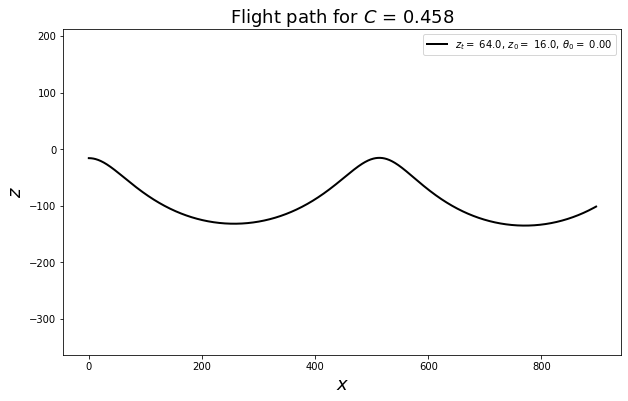

In [9]:
#zt = 64, z = 16, theta=0
plot_flight_path(64, 16, 0)

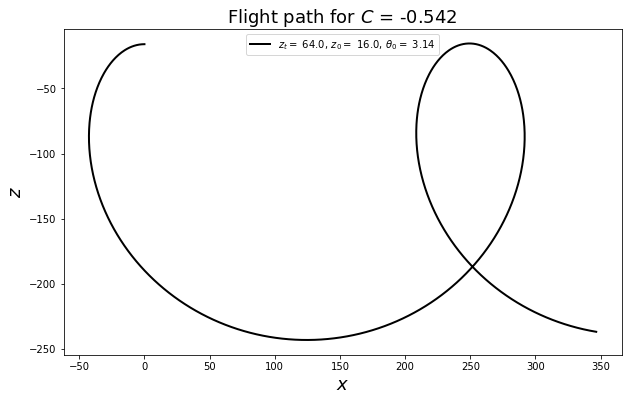

In [10]:
#zt = 64, z = 16, theta=0
plot_flight_path(64, 16, np.pi)

* The last case is $C = 0$.  Take another look at Equation (16) and plug in $C = 0$, what should happen? It looks like it will just reduce to 

$$R = 3z_t$$

It's a constant radius of curvature!  In fact, this solution is a series of semi-circles, with a cusp between them. One way to force $C = 0$ that we can figure out from Equation (15), is to make:


$$z = 3z_t\ \ \ ,\ \ \  \theta = 0$$

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


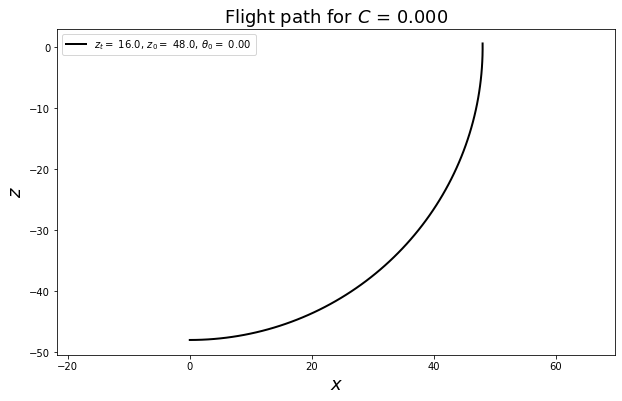

In [11]:
#zt = 64, z = 16, theta=0
plot_flight_path(16,48,0.)

That looks an awful lot like a quarter circle.  And what's the radius of the arc?  It's $$r = 48 = 3z_t.$$

We can also get a semi-circle out of our simulated trammel by changing to another configuration where $C$ is (near) zero. Here's one example:

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


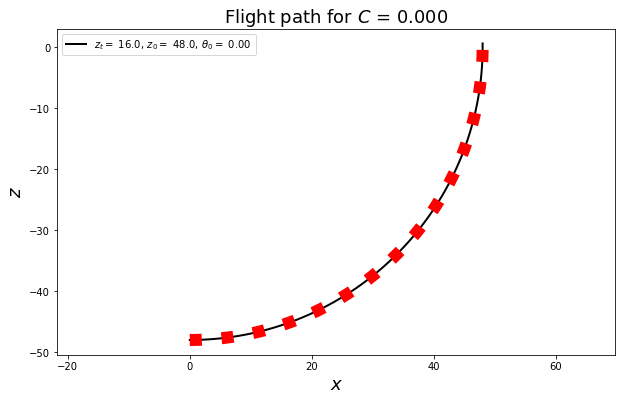

In [12]:
#zt = 64, z = 16, theta=0
plot_flight_path(16,48,0.)
t=np.linspace(-np.pi/2.,0,100)
plt.plot(48.*cos(t),48.*sin(t),'r:',linewidth=12)

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


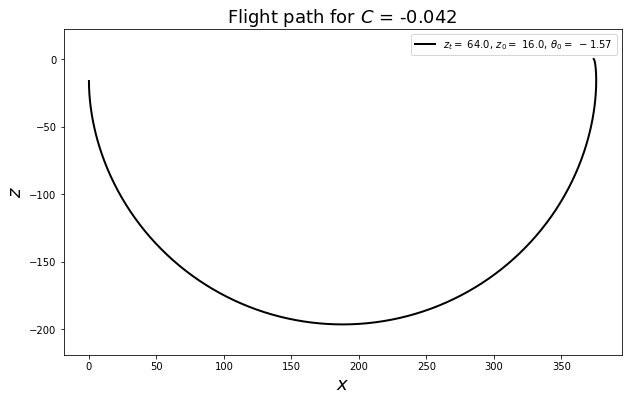

In [13]:
plot_flight_path(64,16,-np.pi/2)

Historic Notes
---
That is so nice. We have reproduced the trajectories that Lanchester found more than a hundred years ago, painstakingly drawing them by hand with a contraption called a "trammel." It must have taken him days!

Here is how the different phugoid curves are drawn in von Kármán's book, Aerodynamics (1957). He never says how he drew them, but we're guessing by hand, also. We did pretty good!

![Image](./images/vonKarman-phugoids.png)

####Figure 4. Phugoid curves in von Kármán (1957).

Reerences
---

1. Lanchester, F. W. _Aerodonetics_, D. van Nostrand Company: New York, 1909. On the public domain. [Get it from Google Books](http://books.google.com/books?id=6hxDAAAAIAAJ&pg=PP1#v=onepage&q&f=false).

2. Milne-Thompson, L. M. _Theoretical Aerodynamics_, Dover 2012 reprint of the revised 1966 edition. [Read on Google Books](http://books.google.com/books?id=EMfCAgAAQBAJ&lpg=PP1&pg=PP1#v=onepage&q&f=false) (see section 18.5)

3. Sinha, N. K. and Ananthkrishnan, N. _Elementary Flight Dynamics with an introduction to Bifurcation and Continuation Methods_, CRC Press, 2013. [Read on Google Books](http://books.google.com/books?id=yXL6AQAAQBAJ&lpg=PP1&pg=PP1#v=onepage&q&f=false) (see chapter 5)

4. von Kármán, T. _Aerodynamics_, Dover 2004 reprint of the 1957 2nd edition. (see pages 149–151)

# Phugoid

    http://en.wikipedia.org/wiki/Phugoid

    This interact shows equations of phugid dynamics. It is 2 dimensional ODE system, which exhibis limit cycle, fixed point and bistability.
    
<img src="images/plane.png">
     
 * $R$ is drag force (relative to the lift i.e. 0.1 means moderate plane)
 * $F$ is thrust force
 * $\theta$ is an angle of flight relative to horizont
 * $v$ is speed of the aircraft

    $$\frac{dv}{dt} = -\sin \theta -R v^2 +F \\\quad \quad \frac{d \theta}{d t }= \frac{v^2- \cos \theta}{v} $$
    
Here, 1) $g$ is set to be one,  2) $F=0$,  3) The *drag* and *lift* forces are proportional to $v^2$ by experiments.


Dimensional Units 
---

\begin{align}
 v' & = - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\
 \theta' & = - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v
\end{align}


where model parameters:
- $g = 9.8$,       *gravity* in $m /s^2$
- $v_t = 30.0$,   *trim velocity* in $m/s^2$, which is  named by the minimal velocity to prevent the flying object not falling down by drag force;   
- $C_D = 1/40$,  *drag* coefficient --- or $D/L $ if $C_L=1$
- $C_L = 1.0$    # for convenience, use $C_L = 1$


There are few interesting cases:
   $R=0, F=0$: ideal glider. There are two states depending on initial velocity: oscilations around $\theta=0$, and loops. Loops can be seen at bigger initial speed, the trajectory goes over $\pi$ (on plot we put it back $-\pi$
   Paper plane: set $R=0.1$ and $F=0$. Note the dependence of flight mode on initial speed. Plane can do a loop or oscilate, but there is always one fixed point.
   Motorized flight. There is a fixed point=limit cycle bistablity: e.g. $R=0.12$ and $F=0.3$ depending on initial velocity the plane reaches fixed point or limit cycle.



## Legend:

Red line is a trajectory $v(\theta)$.
    Blue lines are nullclines of vector field of RHS of ODE.
    Yellow point is a singular point of vector field.
    Green point is an initial condition. We start always at $\theta=0$ but with various speeds.



In [2]:
F=0
R=0.2
h0=2

###
g = 9.8      # gravity in m s^{-2}
v_t = 30.0   # trim velocity in m s^{-1}   
C_D = 1/40.  # drag coefficient --- or D/L if C_L=1
C_L = 1.0    # for convenience, use C_L = 1
###


theta0=0
#v0=5.
v0=v_t/6.
t = np.linspace(0, 20, 2000)

In [ ]:
def dx(X, t):
    """
    The right-hand side of the ODE
    with parameters: X=(xi)=(v,theta,x,y)
    """
    x1, x2, x3, x4 = X[0], X[1], X[2], X[3]
    
    dx1 = -sin(x2)-R*x1*x1+F
    dx2 = (x1*x1-cos(x2))/x1
    
    dx3 = x1*cos(x2)
    dx4 = x1*sin(x2)
    
    return [dx1, dx2, dx3, dx4]

In [4]:
def dxD(X, t):
    """
    ODE for glider object,
    with parameters: X=(xi)=(v,theta,x,y)
    """
    x1, x2, x3, x4 = X[0], X[1], X[2], X[3]
    
    dx1 = -g*sin(x2)-g*C_D/C_L*x1*x1/v_t/v_t+F
    dx2 = g*(x1*x1/v_t/v_t-cos(x2))/x1
    
    dx3 = x1*cos(x2)
    dx4 = x1*sin(x2)
    
    return [dx1, dx2, dx3, dx4]

In [5]:
# the object thrown by v0=5 in angle=0, at the initial position, x=0, height h0=2 
theta0Rad=theta0/180.*pi
x0 = [v0,theta0Rad,0,h0];x0

[5.0, 0.0, 0, 2]

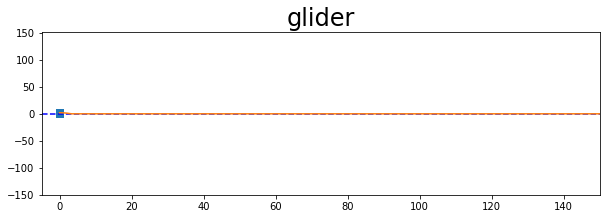

In [6]:
# Glider

x = odeint(dxD, x0, t)

distanceI=(x[:,3]>0)
y=x[:,3].clip(0)
TavelTime=sum(distanceI)

#twfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/bkai00mp.ttf')
#s=u'\u7D19\u98DB\u6A5F'
s='glider'
fig, axes = plt.subplots(figsize=(10,3))

#plt.title(s,fontproperties=twfont,size=24)
plt.title(s,size=24)
#plt.text(3,4,'Initial velocity %2.2f, attack angle%2.1f' %(v0,theta0Rad), size=16)
#plt.text(3,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16)
plt.ylim([-150,h0+150])
plt.xlim([-5,150])
plt.plot([0,0],[0,h0],lw=8)
plt.plot([-5,150],[0,0],'--b')
plt.arrow(0,h0,np.cos(theta0Rad)*0.6,np.sin(theta0Rad)*0.6,color='red',head_width=0.4, head_length=0.4 )
plt.plot(x[:,2],y)

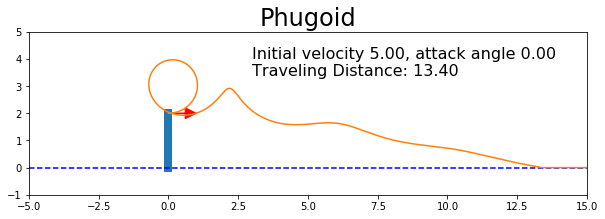

In [7]:
# Paper Plane

x = odeint(dx, x0, t)

distanceI=(x[:,3]>0)
y=x[:,3].clip(0)
TavelTime=sum(distanceI)

#twfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/bkai00mp.ttf')
#s=u'\u7D19\u98DB\u6A5F'
s='Phugoid'
fig, axes = plt.subplots(figsize=(10,3))

#plt.title(s,fontproperties=twfont,size=24)
plt.title(s,size=24)
plt.text(3,4,'Initial velocity %2.2f, attack angle %2.2f' %(v0,theta0Rad), size=16)
plt.text(3,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16)
plt.ylim([-1,h0+3])
plt.xlim([-5,15])
plt.plot([0,0],[0,h0],lw=8)
plt.plot([-5,15],[0,0],'--b')
plt.arrow(0,h0,np.cos(theta0Rad)*0.6,np.sin(theta0Rad)*0.6,color='red',head_width=0.4, head_length=0.4 )
plt.plot(x[:,2],y)

In [9]:
def phogoid(t,h0,theta0,v0):
    attack_ang=theta0
    theta0=theta0/180.*pi
    
    x0 = [v0,theta0,0,h0];
    x = odeint(dx, x0, t);
    distanceI=(x[:,3]>0)
    y=x[:,3].clip(0)
    TavelTime=sum(distanceI)
    
    fig, axes = plt.subplots(figsize=(10,3))
    plt.title('Paper Plane', size=24)
    plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.0f°' %(v0,attack_ang), size=16, color='grey')
    plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
    plt.ylim([-1,h0+3])
    plt.xlim([-5,15])
    plt.plot([0,0],[0,h0],lw=8)
    plt.plot([-5,15],[0,0],'--b')
    plt.arrow(0,h0,np.cos(theta0)*0.6,np.sin(theta0)*0.6,color='red',head_width=0.4, head_length=0.4)
    plt.grid()
    plt.plot(x[:,2],y)

In [18]:
theta0

0

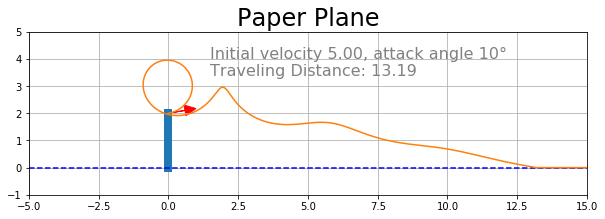

In [10]:
theta0=10
phogoid(t,h0,theta0,5)

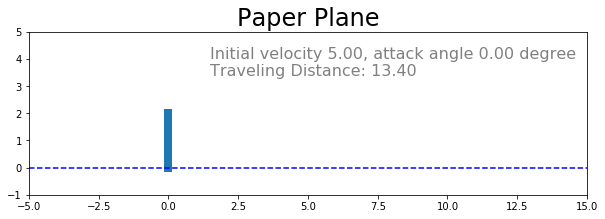

In [22]:
ratio=20
anim = plt.figure(figsize=(10,3))
ax = anim.add_subplot(111)
ax.set_title("Paper Plane",fontsize=14)

plt.ylim([-1,h0+3])
plt.xlim([-5,15])
plt.plot([0,0],[0,h0],lw=8)
plt.plot([-5,15],[0,0],'--b')
plt.title('Paper Plane', size=24)
plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.2f degree' %(v0,theta0), size=16, color='grey')
plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
def init():
    return   None
def animate(i):
    if (i>0):
        dx=(x[i*ratio,2]-x[(i-1)*ratio,2])#/np.abs(x[i*ratio,2]-x[(i-1)*ratio,2])*0.4
        dy=(y[i*ratio]-y[(i-1)*ratio])#/np.abs(y[i*ratio]-y[(i-1)*ratio])*0.4
    else:
        dx=np.cos(theta0)*0.6;
        dy=np.sin(theta0)*0.6;
    return ax.plot(x[0:ratio*i:ratio,2],y[0:ratio*i:ratio],'--r'), \
        ax.arrow(x[i*ratio,2],y[i*ratio],dx,dy,color='red',head_width=0.4, head_length=0.4,alpha=0.3)


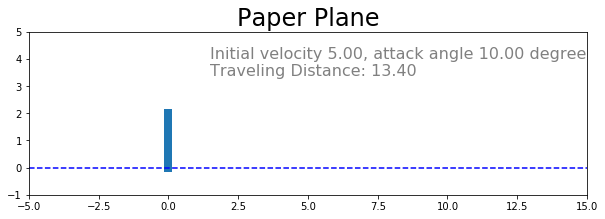

In [31]:
theta0=10
v0=5.

ratio=20
anim = plt.figure(figsize=(10,3))
ax = anim.add_subplot(111)
ax.set_title("Paper Plane",fontsize=14)

plt.ylim([-1,h0+3])
plt.xlim([-5,15])
plt.plot([0,0],[0,h0],lw=8)
plt.plot([-5,15],[0,0],'--b')
plt.title('Paper Plane', size=24)
plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.2f degree' %(v0,theta0), size=16, color='grey')
plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
def init():
    return None
def animate(i):
    if (i>0):
        dx=(x[i*ratio,2]-x[(i-1)*ratio,2])#/np.abs(x[i*ratio,2]-x[(i-1)*ratio,2])*0.4
        dy=(y[i*ratio]-y[(i-1)*ratio])#/np.abs(y[i*ratio]-y[(i-1)*ratio])*0.4
    else:
        dx=np.cos(theta0)*0.6;
        dy=np.sin(theta0)*0.6;
    ax.plot(x[0:ratio*i:ratio,2],y[0:ratio*i:ratio],'--r'), \
        ax.arrow(x[i*ratio,2],y[i*ratio],dx,dy,color='red',head_width=0.4, head_length=0.4,alpha=0.3)
    return mplfig_to_npimage(anim)

In [14]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

 98%|█████████▊| 40/41 [00:02<00:00, 16.70it/s]


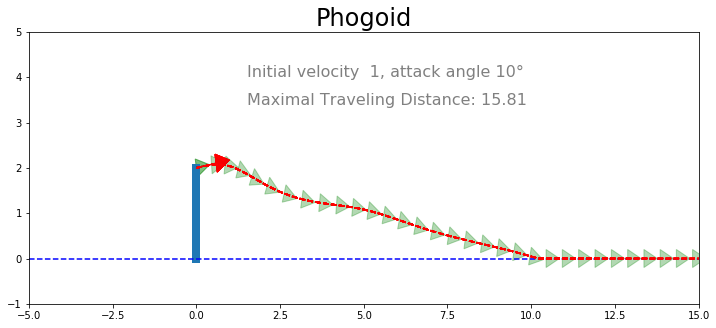

In [35]:
# a 4-second animation with fps being 10
# each dt display len(x)/4
# v,theta,x,y
fig, ax = plt.subplots(figsize=(12,5))
h0=2
v0=1
theta0=10
attack_ang=theta0
theta0=theta0/180.*pi

x0 = [v0,theta0,0,h0];
t = np.linspace(0, 20, 2000)
x = odeint(dx, x0, t);
distanceI=(x[:,3]>0)
y=x[:,3].clip(0)

ax.set_ylim([-1,h0+3])
ax.set_xlim([-5,15])
ax.plot([0,0],[0,h0],lw=8);
ax.plot([-5,15],[0,0],'--b');
ax.set_title('Phogoid', size=24)
ax.text(1.5,4,'Initial velocity %2.0f, attack angle %2.0f°' %(v0,attack_ang), size=16, color='grey');
ax.text(1.5,3.4, 'Maximal Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey');

duration=4

playing=len(x)/duration
def animate(t):
    len=int(playing*t)

    dx=np.cos(theta0)*0.6;
    dy=np.sin(theta0)*0.6;
    ax.arrow(x[0,2],y[0],dx,dy,color='red',head_width=0.4, head_length=0.4,alpha=0.1);
    ax.plot(x[0:len,2],y[0:len],'--r');
    dx=(x[len+1,2]-x[len,2])*0.1
    dy=(y[len+1]-y[len])*0.1
    ax.arrow(x[len,2],y[len],dx,dy,color='green',head_width=0.4, head_length=0.4,\
                     alpha=0.3);
    return mplfig_to_npimage(fig)
animation = VideoClip(animate, duration=duration);
animation.ipython_display(fps=10, loop=True, autoplay=True)


Wind Tunnel
---
The tunnels are used to duplicate the actions of an aircraft in flight. Researchers usually use wind tunnels to learn more about how an aircraft will fly. Here, we will simulate the data how the aircraft flys before it was made. 

In [36]:
x0 = [v0,theta0,0,h0];
t = np.linspace(0, 20, 2000)
x = odeint(dx, x0, t);
distanceI=(x[:,3]>0)
y=x[:,3].clip(0)
TavelTime=sum(distanceI)
ratio=20   

In [33]:
def phogoid2(theta0,v0):
    angle=theta0/180.*pi
    
    x0 = [v0,angle,0,h0];
    x = odeint(dx, x0, t);
    distanceI=(x[:,3]>0)
    y=x[:,3].clip(0)
    TavelTime=sum(distanceI)
    
    figM = plt.figure(figsize=(10,3))
    ax=figM.add_subplot(111)
    plt.title('Phogoid')
    #plt.text(1.5,4,'Initial velocity %2.0f, attack angle %2.0f degree' %(v0,theta0), size=16, color='grey')
    #plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
    ax.text(1.5,4,'Initial velocity %2.0f, attack angle %2.0f°' %(v0,attack_ang), size=16, color='grey');
    ax.text(1.5,3.4, 'Maximal Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey');
    
    plt.ylim([-1,h0+3])
    plt.xlim([-5,15])
    ax.plot([0,0],[0,h0],lw=8)
    ax.plot([-5,15],[0,0],'--b')
    ax.arrow(0,h0,np.cos(angle),np.sin(angle),color='red',head_width=0.4, head_length=0.4)

    plt.grid()
    ax.plot(x[:,2],y)
    return figM

In [37]:
interactive(phogoid2,theta0=(0, 90, 5),v0=(0.5, 5, 0.5))

interactive(children=(IntSlider(value=45, description='theta0', max=90, step=5), FloatSlider(value=2.5, descri…

Questtions
---
1. What is the maximal trajectory that teh object above could travels?
2. In what condition does the phogoid fly without turn around?

## Traffic Jam (ASEP Model)

In fluid mechanics, the less the radius of pipe is , the farther the water spings out.

However, we have always jam in the narrow highway. Why?

Answer
---
Water can be compressed but cars cannot!



**Reference**

1. 西城活裕 （にしなり かつひろ), 『渋滞学』新潮選書, 2006
2. B. Derrida, S.A. Janowsky, J.L. Lebowitz, E.R. Speer, Exact solution of the totally asymmetric simple exclusion process: shock profiles J. Stat. Phys. 73, 813-842 (1993)
3. B. Derrida, M.R. Evans, V. Hakim, V. Pasquier, Exact solution of a 1d asymmetric exclusion model using a matrix formulation J. Phys. A26, 1493-1517 (1993) 

Computer Experiment
---
1. Simulate a sequences in the same direction,
- each object in the sequence move forward if no other object ahead itself,
For instance, there are 80 cars drive in highway: any car could run without any limit if no other car is ahead of it; but the jam, if any, should slow its velocity.


In [40]:
ACTIVE = True
PASSIVE = False

class Node:
    def __init__(self, state):
        self._state = state

    def flip(self):
        self._state = not self._state
        return self._state

    def state(self):
        return self._state

    def __str__(self):
        return self._state and "D" or "-"

 

class AsepField(list):
    def __init__(self, length):
        list.__init__(self, [Node(PASSIVE) for _ in range(length)])

    def update(self):
        def pred(idx):
            return self[idx].state() and \
                   not self[(idx+1)%len(self)].state()
        predlst = [pred(x) for x in range(len(self))]
        for i in range(len(self)):
            if predlst[i]:
               self[i].flip()
               self[(i+1)%len(self)].flip()

    def __str__(self):
        strs = list(map(str, self))
        s = "<AsepField at %d [%s]>" % (id(self), ", ".join(strs))
        return s 

def aesp(*args):
    arg = [int(x) for x in args]
    asep = AsepField(arg[0])

    # init 
    for i in range(arg[1]):
        lst = [x for x in range(len(asep)) if not asep[x].state()]
        idx = random.choice(lst)
        asep[idx].flip()

    # mainloop
    for i in range(arg[2]):
        #print "".join(map(str, asep))+ "\r",
        print("".join(map(str,asep)))
        #time.sleep(0.5)
        asep.update()

In [38]:

def aesp2(*args):
    arg = [int(x) for x in args]
    asep = AsepField(arg[0])

    # init 
    for i in range(arg[1]):
        lst = [x for x in range(len(asep)) if not asep[x].state()]
        idx = random.choice(lst)
        asep[idx].flip()


    for i in range(arg[2]):
        #print "".join(map(str, asep))+ "\r",$
        #time.sleep(0.2)
        clear_output(wait=True)
        print("".join(map(str,asep)))

        time.sleep(0.3)
        asep.update()  
        #sys.stdout.flush()

In [45]:
aesp2(80,69,40)

D-DDDDD-DDDDD-D-D-DDD-D-DDDDDDDDDDDDDDDDDDDDDDD-DD-DDDDDDDDDDDDDDDDDD-D-DDDDDDDD


In [44]:
aesp(80,69,20)

D-DDDDDDDDDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDD
-DDDDDDDDDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD
DDDDDDDDDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-
DDDDDDDDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-D
DDDDDDDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-DD
DDDDDDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-DDD
DDDDDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-DDDD
DDDDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-DDDDD
DDDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-DDDDDD
DDDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-DDDDDDD
DDDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-DDDDDDDD
DDDD-D-DDDDDD-DDDDDDD-DDD-DDDDDD-DDDD-DDDDDDDDDD-DD-DD-DDDDDDDDDDDDDDD-DDDDDDDDD
DDD-D-DDDDDD-DDDDDDD-DDD-DDD

In [2]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())

In [26]:
%%bash

ipython nbconvert --to html 2014-2-5.ipynb

[NbConvertApp] Using existing profile dir: u'/Users/cchcch/.ipython/profile_default'
[NbConvertApp] Converting notebook 2014-2-5.ipynb to html
[NbConvertApp] Support files will be in 2014-2-5_files/
[NbConvertApp] Loaded template full.tpl
[NbConvertApp] Writing 6794760 bytes to 2014-2-5.html
